# Icecream Revenue Prediction

**Name:** Faizan Ali Khan  
**Date:** 11/8/2025

**Project:** Icecream Revenue Prediction (Ready-to-submit)

This notebook trains a simple regression model to predict icecream revenue from temperature.

**Contents:**
- Load local dataset (`icecream_revenue_data.csv`)
- Train/Test split, Linear Regression
- Evaluation (MSE, R²)
- Plots showing actual vs predicted


In [1]:
# Install required packages (uncomment and run if needed)
# !pip install pandas numpy matplotlib scikit-learn

# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print('Libraries loaded')

Libraries loaded


In [2]:
# Load dataset (local)
df = pd.read_csv(r'/mnt/data/icecream_project_faizan/icecream_revenue_data.csv')
df.head()

,Temperature,Revenue
0,15.000000,299.868566
1,15.423729,279.554174
2,15.847458,316.077033
3,16.271186,356.175432
4,16.694915,290.972848


Rows: 60
       Temperature     Revenue
count    60.000000   60.000000
mean     27.500000  423.813813
std       7.400106   95.486643
min      15.000000  269.570485
25%      21.250000  344.707763
50%      27.500000  410.343952
75%      33.750000  495.365169
max      40.000000  619.021805


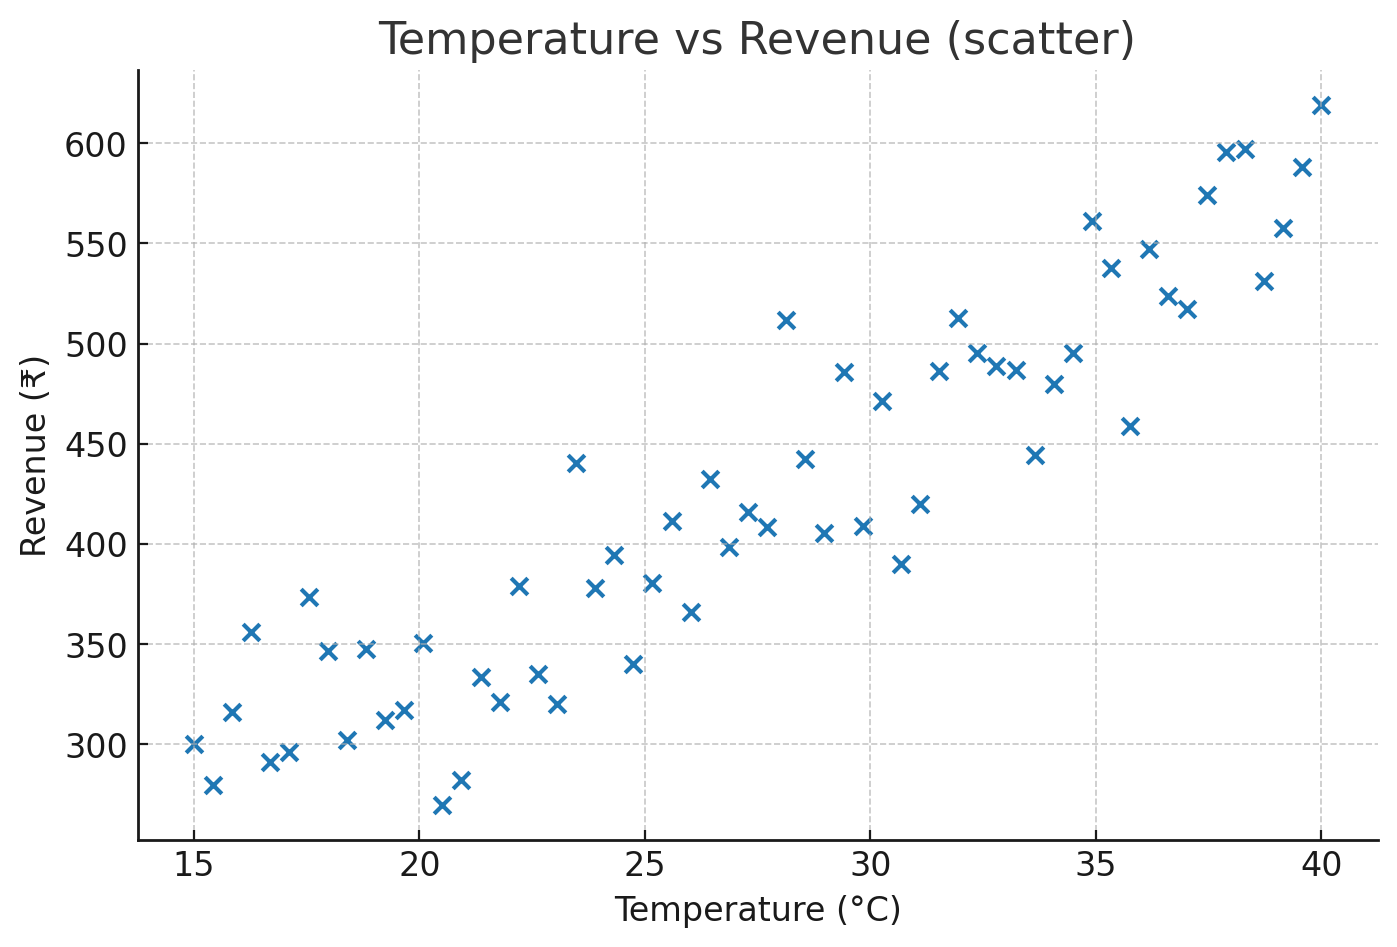

In [3]:
# Basic EDA
print('Rows:', len(df))
print(df.describe())

plt.figure(figsize=(8,5))
plt.scatter(df['Temperature'], df['Revenue'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Revenue (₹)')
plt.title('Temperature vs Revenue (scatter)')
plt.grid(True)
plt.show()

In [4]:
# Prepare data
X = df[['Temperature']].values
y = df['Revenue'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train size:', len(X_train), 'Test size:', len(X_test))

Train size: 48 Test size: 12


In [5]:
# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
print('Model trained')

# Coefficients
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)

Model trained
Intercept: 103.01488706570217
Coefficient: [11.66643723]


In [6]:
# Predict on test set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', round(mse,3))
print('R² Score:', round(r2,3))

Mean Squared Error: 966.426
R² Score: 0.919


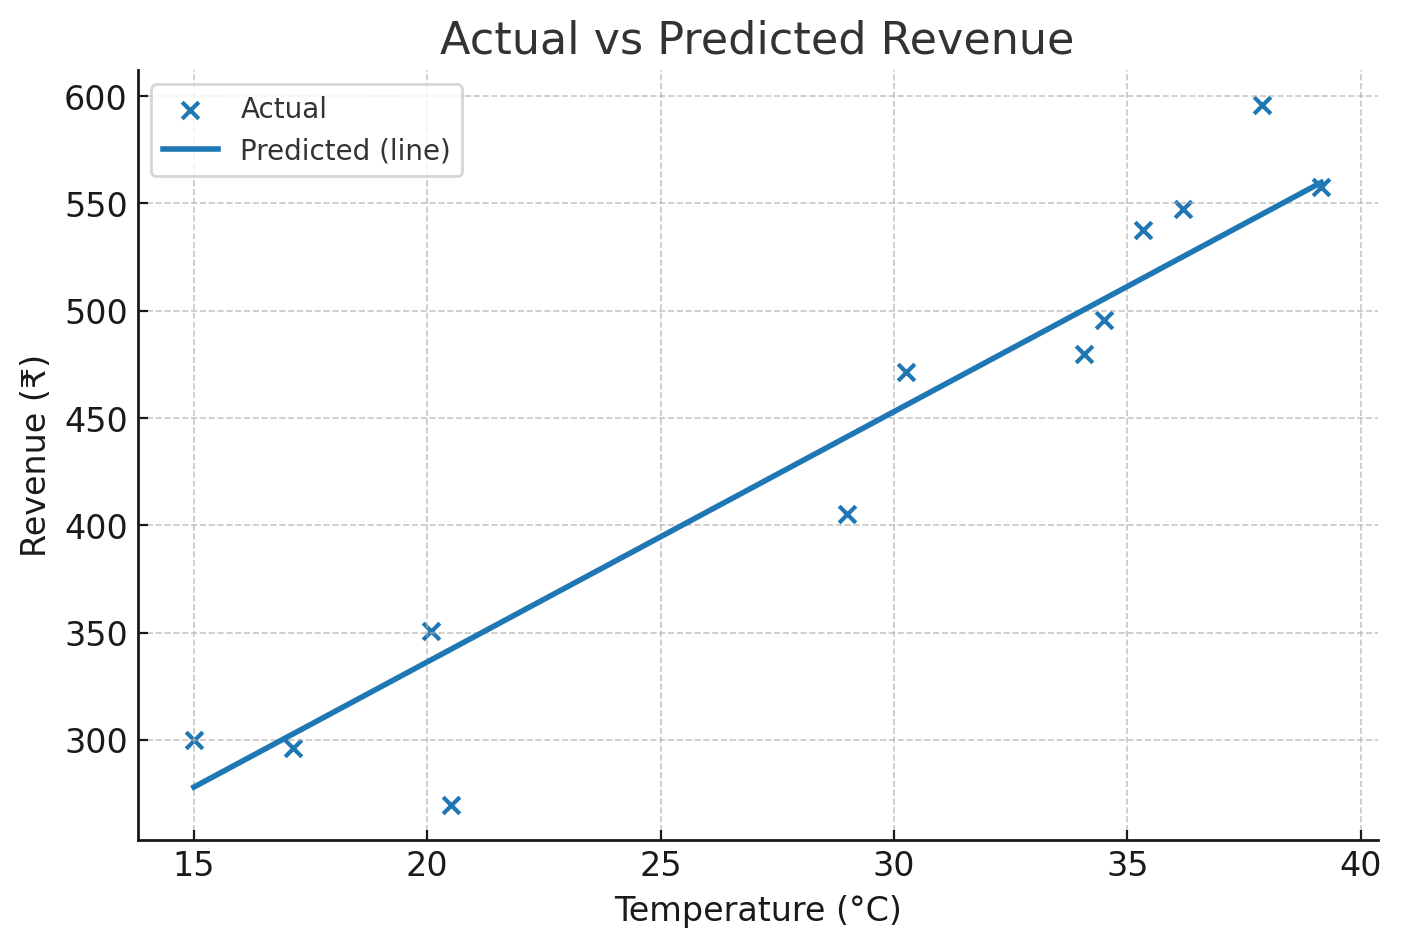

In [7]:
# Plot actual vs predicted
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, label='Actual')
# For a smooth line, predict on sorted X
sorted_idx = np.argsort(X_test[:,0])
sorted_X = X_test[sorted_idx]
sorted_pred = y_pred[sorted_idx]
plt.plot(sorted_X, sorted_pred, linewidth=2, label='Predicted (line)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Revenue (₹)')
plt.title('Actual vs Predicted Revenue')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Save model summary (relative path)
summary = {
    'name': 'Faizan Ali Khan',
    'date': '11/8/2025',
    'intercept': float(model.intercept_),
    'coefficient': float(model.coef_[0]),
    'mse': float(mse),
    'r2': float(r2)
}
import json
with open('summary.json', 'w') as f:
    json.dump(summary, f, indent=4)

print('Summary saved to summary.json')

Summary saved to summary.json
